# Assignment 2

### Question 1) 
Read the "earthquake.csv" file as a DataFrame object. 
Each row represents a report sent from someone’s mobile phone indicating an emergency or some other problem. Each has an associated timestamp as "incident date" and a location as "latitude" and "longitude". Print the first 10 records for these 3 columns.

In [31]:
#solution code
import pandas as pd
df = pd.read_csv("earthquake.csv")
display(df[['INCIDENT DATE','LATITUDE','LONGITUDE']].head(10))

,INCIDENT DATE,LATITUDE,LONGITUDE
0,05/07/2010 17:26,18.233333,-72.533333
1,28/06/2010 23:06,50.226029,5.729886
2,24/06/2010 16:21,22.278381,114.174287
3,20/06/2010 21:59,44.407062,8.933989
4,18/05/2010 16:26,18.571084,-72.334671
5,26/04/2010 13:14,18.593707,-72.310079
6,26/04/2010 14:19,18.482800,-73.638800
7,26/04/2010 14:27,18.415000,-73.195000
8,15/03/2010 10:58,18.517443,-72.236841
9,15/03/2010 11:00,18.547790,-72.410010


### Question 2)
The CATEGORY field contains a comma-separated list of codes indicating the type of message. Check the rows for missing values in "CATEGORY" column. Show which entries in a dataFrame are missing.

In [32]:
#solution code
display(df[df['CATEGORY'].isnull()])

,Serial,INCIDENT TITLE,INCIDENT DATE,LOCATION,DESCRIPTION,CATEGORY,LATITUDE,LONGITUDE,APPROVED,VERIFIED
1198,2777,"Food needed in Castro area, near airport 10 De...",24/01/2010 23:31,10 Dessaline Road,hungry grangou. We are in the Cit?? Castro a...,NaN,18.567320,-72.293280,YES,NO
1531,2436,Food Needed in Fontamara 27,22/01/2010 23:04,Fontamara 27 (off Rue National 2) Coordinates ...,NOU NAN FONTAMARA 27 PROLONGE NOU PA WE PES?N\...,NaN,18.532570,-72.367540,YES,NO
1828,2130,"15 People, 5 Babies, Water and Food Needed at ...",23/01/2010 18:07,Airport Runway Entrance - one end of the runwa...,nou sou wout aewopo a antre pis la nou se 15 f...,NaN,18.580320,-72.312390,YES,NO
2620,1182,Trapped person,19/01/2010 05:19,"Delmas, 33 Rue Derrosier Impas Du Crist, Numbe...",Mwen.se MADAM LAINE FRITZ MWEN RETE DELMAS 33 ...,NaN,18.559451,-72.295522,YES,NO
2622,1179,500 to 600 people in a temporary shelter with ...,19/01/2010 05:57,"Grand Goave, Haiti",Nou anviron 500 a 600 moun nan abri pwoviswa g...,NaN,18.431400,-72.787200,YES,NO
2623,1178,500 to 600 people in a temporary shelter with ...,19/01/2010 05:57,"Grand Goave, Haiti",Nou anviron 500 a 600 moun nan abri pwoviswa g...,NaN,18.424764,-72.770300,YES,NO


### Question 3) 

If you notice above in the data summary, some of the categories are missing, so we might want to drop these data points. Additionally, call the describe function to show that there are some aberrant locations.
Clean the bad locations by considering conditions below and remove the missing categories. 

Conditions for location: 
- Latitude should be range of between 18 and 20
- Longitude should be range of between -70 and -75
            

In [33]:
#solution code
df.dropna(subset='CATEGORY', inplace=True)
display(df.describe())
df = df[(df['LATITUDE']>18) & (df['LATITUDE']<20) & (df['LONGITUDE']>-75) & (df['LONGITUDE']<-70)]
display(df.describe())

,Serial,LATITUDE,LONGITUDE
count,3587.000000,3587.000000,3587.000000
mean,2080.723446,18.611655,-72.322432
std,1171.716976,0.739174,3.653812
min,4.000000,18.041313,-74.452757
25%,1071.500000,18.524099,-72.417500
50%,2164.000000,18.539269,-72.335000
75%,3089.500000,18.561810,-72.293473
max,4052.000000,50.226029,114.174287


,Serial,LATITUDE,LONGITUDE
count,3569.000000,3569.000000,3569.000000
mean,2081.498459,18.592503,-72.424994
std,1170.311824,0.273695,0.291018
min,4.000000,18.041313,-74.452757
25%,1074.000000,18.524200,-72.417498
50%,2166.000000,18.539269,-72.335000
75%,3089.000000,18.561800,-72.293939
max,4052.000000,19.940630,-71.099489


Now we might want to do some analysis or visualization of this data by category, but each category field may have multiple categories. Additionally, each category is given as a code plus an English and possibly also a French code name. Thus, a little bit of wrangling is required to get the data into a more agreeable form. First, write the functions to get a list of all the categories and to split each category into a code and an English name

In [34]:
#solution code
#Function to get a list of all the categories
def get_categories_list():
    dfList = df[['CATEGORY']].values.tolist()
    categoryList = []
    for rowAsList in dfList:
        splittedRow = rowAsList[0].split(", ")
        splittedRow.remove("")
        for element in splittedRow:
            if(element not in categoryList):
                categoryList.append(element)
    return categoryList

#Function to split the given category into a code and English name
def get_english(element):
    elements = element.split(". ")
    languages = elements[1].split(" | ")
    if(len(languages) > 1):
        lang = languages[1]
    else:
        lang = languages[0]
    return (elements[0], lang)

#Function to split every category into a code and English name
def split_categories():
    splitted_categories = []
    for category in get_categories_list():
        splitted_categories.append(get_english(category))
    return splitted_categories

You can better understand how to write a function by looking at the result obtained from the **_get english_** function below.

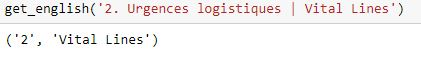

In [35]:
#solution code
get_english('2. Urgences logistiques | Vial Lines')

('2', 'Vial Lines')

### Question 4)

Write a function to make a dict mapping code to name for "CATEGORY" column.

In [36]:
#solution code
def english_mapping(index):
    for element in split_categories():
        if(element[0] == index):
            return element[1]


You can better understand how to write a function by looking at the result obtained from the **_english_mapping_** below.

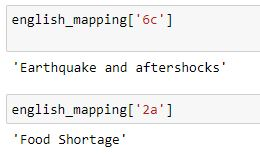

In [37]:
#solution code
display(english_mapping('6c'))
display(english_mapping('2a'))

'Earthquake and aftershocks'

'Food Shortage'

### Question 5) 
Read the "births.csv" file as a DataFrame object. Use a pivot table to understand the data. Add a column called "quinquennial" to analyze male and female total births every five years.

In [38]:
#solution code
birthData = pd.read_csv("births.csv")
birthsDf = pd.pivot_table(data=birthData, values='births', columns='gender', index='year', aggfunc=sum)
q5Df = birthsDf.assign(F=birthsDf.F.cumsum())
q5Df = q5Df.assign(M=q5Df.M.cumsum())

q5Df.columns.name = None
q5Df.index.name = 'quinquennial'
q5Df = q5Df.loc[1973:,:].iloc[::5,:]
q5Df.index -= 4
display(q5Df)


,F,M
quinquennial,,
1969,8435021,8878893
1974,16310872,17174164
1979,25123743,26442862
1984,34353348,36139593
1989,44308201,46582643
1994,53872004,56603172
1999,63727445,66930018
2004,74035823,77738555


### Question 6)
Plot the total number of US births by year and gender to see the annual trend in births by gender. Make your own comment for the graph.

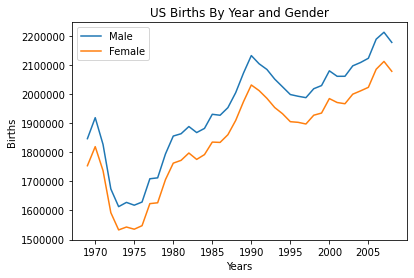

In [39]:
#solution code
import matplotlib.pyplot as plt

years = birthsDf.index
fig, ax = plt.subplots()
ax.plot(years, birthsDf['M'], label = "Male")
ax.plot(years, birthsDf['F'], label = "Female")
ax.set_title("US Births By Year and Gender")
ax.set_xlabel("Years")
ax.set_ylabel("Births")
ax.ticklabel_format(style='plain')
ax.legend()
plt.show()

# Male and female births are following the same annual trend between 1969 and 2008(both endpoints are included).

### Question 7)
Display the mean of birth values for females and males in the same histogram.

Note: x-axis: mean values, y-axis: year of birth

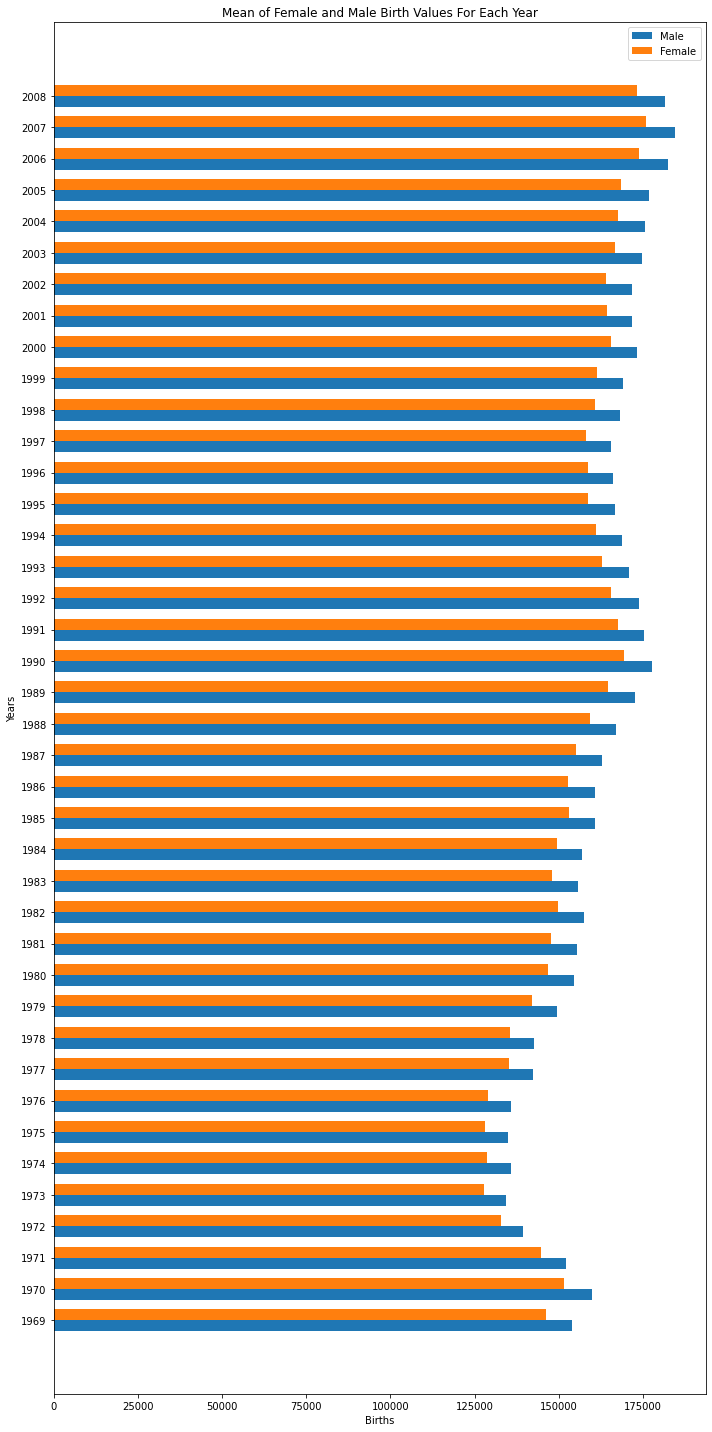

In [40]:
#solution code
import numpy as np
q7Df = pd.pivot_table(data=birthData, values='births', columns='gender', index='year', aggfunc=lambda num : sum(num)/12)
years = q7Df.index

yLocations = np.arange(len(years))
width = 0.35

fig, ax = plt.subplots()
maleGraph = ax.barh(yLocations - width/2, q7Df['M'], width, label='Male')
femaleGraph = ax.barh(yLocations + width/2, q7Df['F'], width, label='Female')

ax.set_title('Mean of Female and Male Birth Values For Each Year')
ax.set_xlabel('Births')
ax.set_ylabel('Years')
ax.set_yticks(yLocations, years)
ax.legend()
fig.set_figwidth(10)
fig.set_figheight(20)
fig.tight_layout()
plt.show()


### Question 8)

Read the "tip.csv" file as a DataFrame object. Add a column presents tip percentage of total bill and generate a KDE (Kernel Density Estimate) plot.


<AxesSubplot:xlabel='tip_percentage', ylabel='Density'>

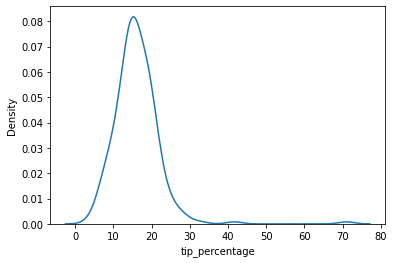

In [41]:
# solution code
import seaborn as sns
tipData = pd.read_csv("tip.csv")
tipData['tip_percentage'] = tipData['tip']*100/tipData['total_bill']
display(sns.kdeplot(tipData['tip_percentage']))


### Question 9)
Group the tip data by sex and smoker to present mean and standard deviation scores for tip percentage.

In [42]:
# solution code
q9Data = tipData.copy()
q9Data['standart_deviation_tip_percentage'] = q9Data['tip_percentage']
q9Data.rename(columns={'tip_percentage' : 'mean_tip_percentage'}, inplace=True)
q9Df = pd.pivot_table(data=q9Data, values='mean_tip_percentage', index=['sex','smoker'], aggfunc=np.mean)
std = pd.pivot_table(data=q9Data, values='standart_deviation_tip_percentage', index=['sex','smoker'], aggfunc=np.std)
q9Df['standart_deviation_tip_percentage'] = std['standart_deviation_tip_percentage']
display(q9Df)

mean_tip_percentage  standart_deviation_tip_percentage
sex    smoker                                                        
Female No                15.692097                           3.642118
       Yes               18.215035                           7.159451
Male   No                16.066872                           4.184875
       Yes               15.277118                           9.058794

### Question 10)
Create a stacked bar plot displaying the frequency of data points for each size on each day

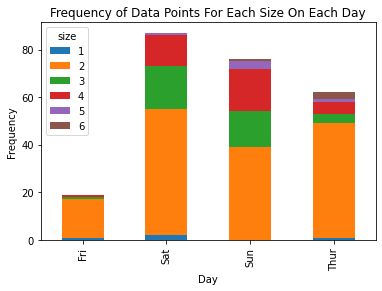

In [43]:
# soution code
tipData.groupby(['day','size']).size().unstack().plot(kind='bar', stacked=True,)
plt.title('Frequency of Data Points For Each Size On Each Day')
plt.ylabel('Frequency')
plt.xlabel('Day')
plt.show()

### Question 11)

Create a new stacked bar plot that has normalized values from a graph at Q10 so that each row sums to 1.

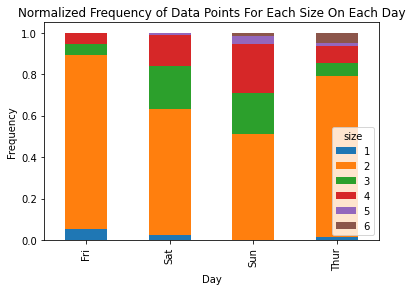

In [44]:
# solution code
q11Df = tipData.groupby(['day','size']).size().unstack()
q11Df.div(q11Df.sum(axis=1), axis=0).plot(kind='bar', stacked=True)
plt.title('Normalized Frequency of Data Points For Each Size On Each Day')
plt.ylabel('Frequency')
plt.xlabel('Day')
plt.show()